# Visualizations and EDA


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

df_user = pd.read_csv("df_user_aggregated.csv")

In [4]:
df_user.head()

,new_id,SUCCESS_LEVEL_last,GENDER_first,ADMIT_TERM_CODE_first,APPL_STATUS_IN_CA_NAME_first,CURRENT_STAY_STATUS_last,PRIMARY_PROGRAM_CODE_first,SessionId_count,Timestamp_min,Timestamp_max,...,longest_consecutive_active_days,rolling_avg_trend_slope,LOG_COUNT_first_week,LOG_STD_first_week,session_span_days,activity_delay_days,AGE_GROUP_ordinal,ACADEMIC_PERFORMANCE_ordinal,program_category,PROGRAM_CREDENTIAL_mapped
0,0000cf80a3f3206a,Successful,F,2022-09-01,Study Permit (student visa),Graduated - On Time,1207.0,524,2022-09-01,2022-12-10,...,41,2.265733e-07,12,1.414214,100.0,0.0,5,2,Community & Health Studies,Diploma
1,00024c40cef486cc,Unsuccessful,M,2022-09-01,Canadian Citizen,Left College - Enrolled 2 Terms,3703.0,157,2022-09-06,2022-12-10,...,7,3.183529e-08,17,2.073644,95.0,5.0,0,0,Engineering Technology & Applied Science,Diploma
2,0002d2ebd89ea8cd,Successful,M,2022-09-01,Study Permit (student visa),Graduated - On Time,3776.0,437,2022-09-06,2022-12-10,...,33,2.731579e-07,25,2.225395,95.0,5.0,4,2,Engineering Technology & Applied Science,Diploma
3,000698ff5c581e09,Successful,F,2022-09-01,Study Permit (student visa),Graduated - On Time,2890.0,302,2022-09-01,2022-12-10,...,35,9.430580e-08,3,0.000000,100.0,0.0,3,2,Business School,Certficate
4,000915a44be41906,Unsuccessful,F,2022-09-01,Study Permit (student visa),Stepped Out - 2 Terms Away,3109.0,431,2022-09-06,2022-12-10,...,21,-9.588078e-08,45,3.779645,95.0,5.0,2,1,Engineering Technology & Applied Science,Diploma


Starting EDA visualizations...


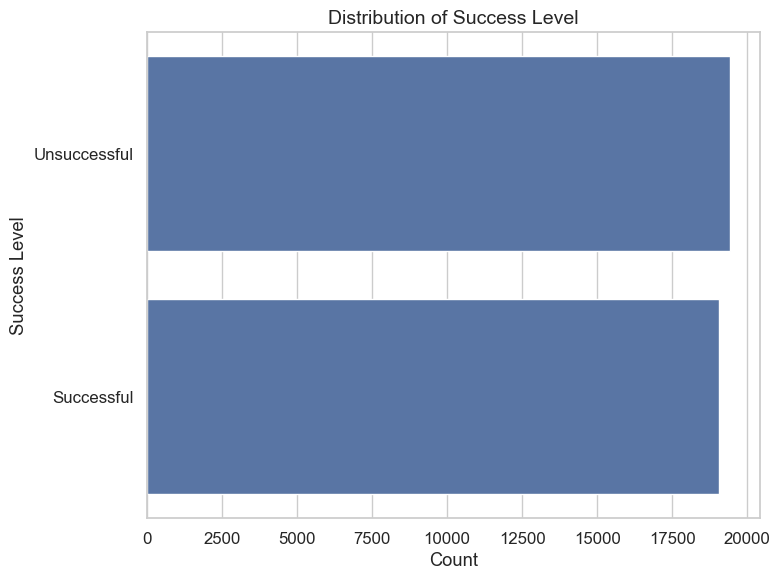

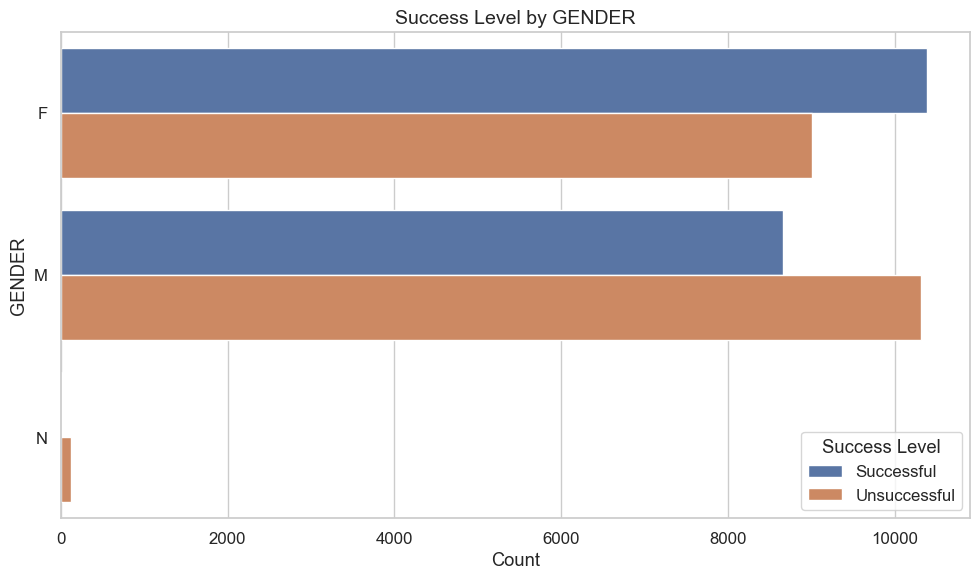

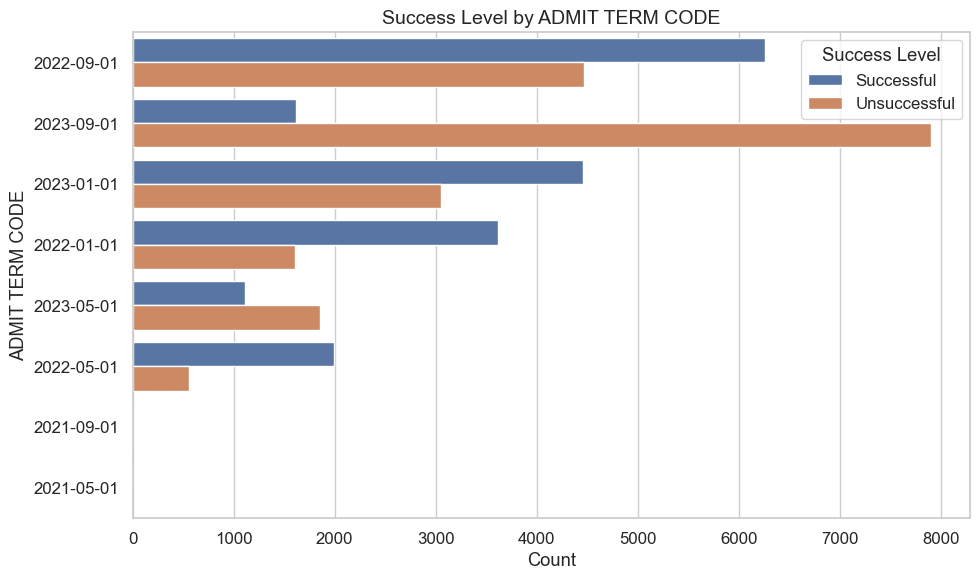

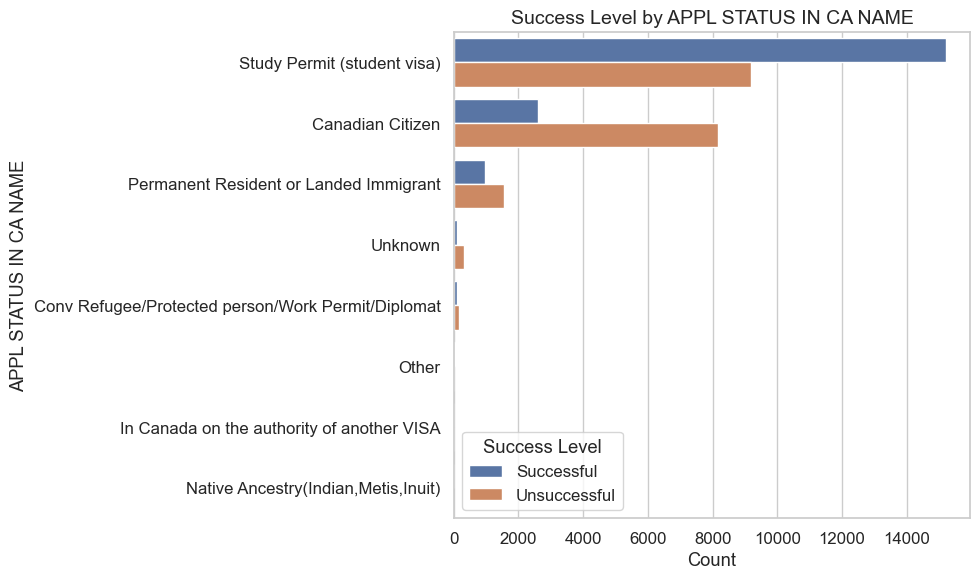

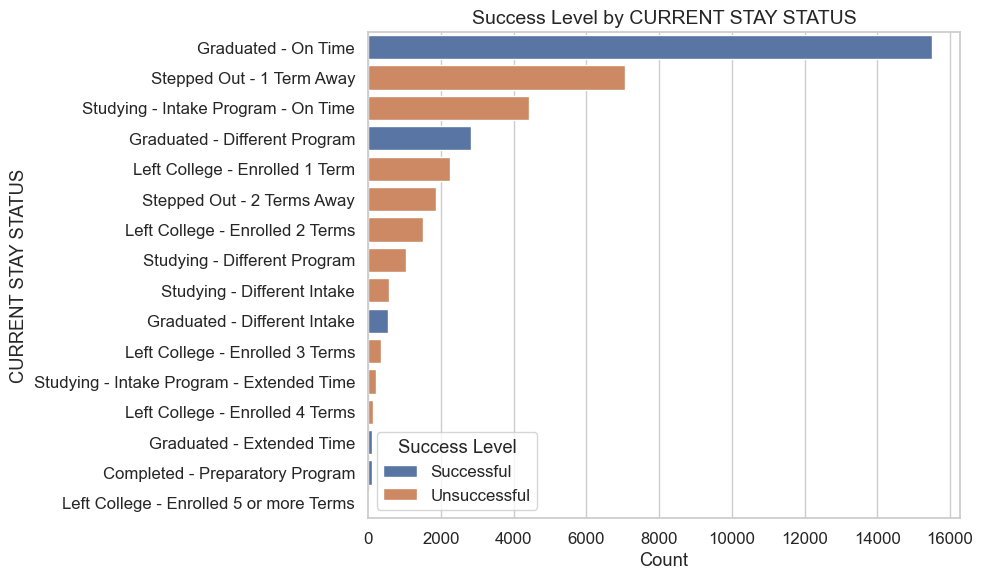

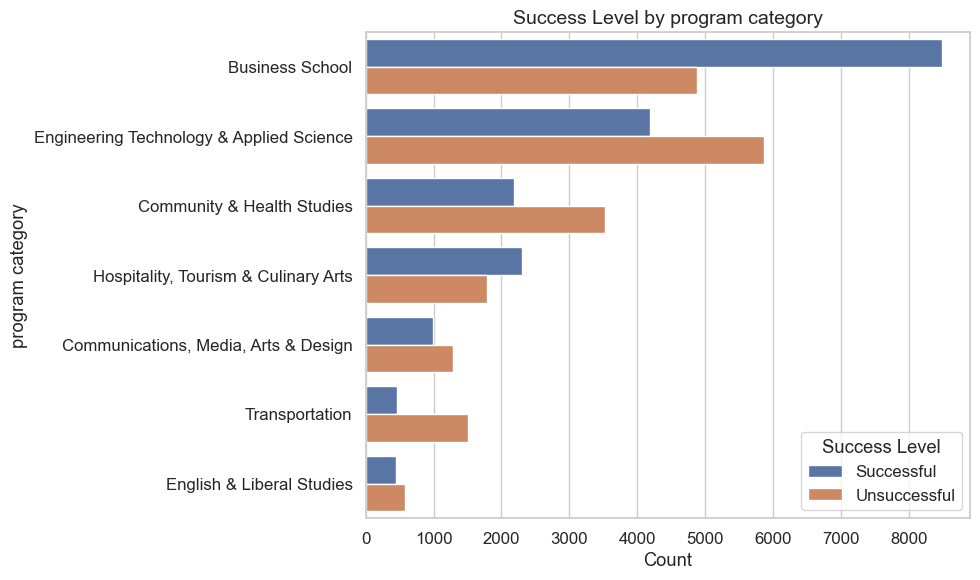

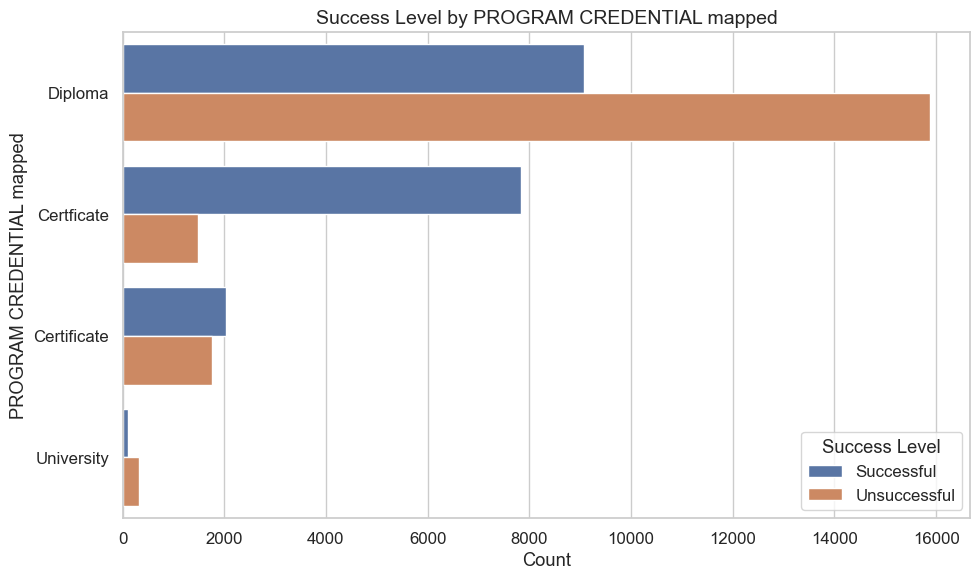

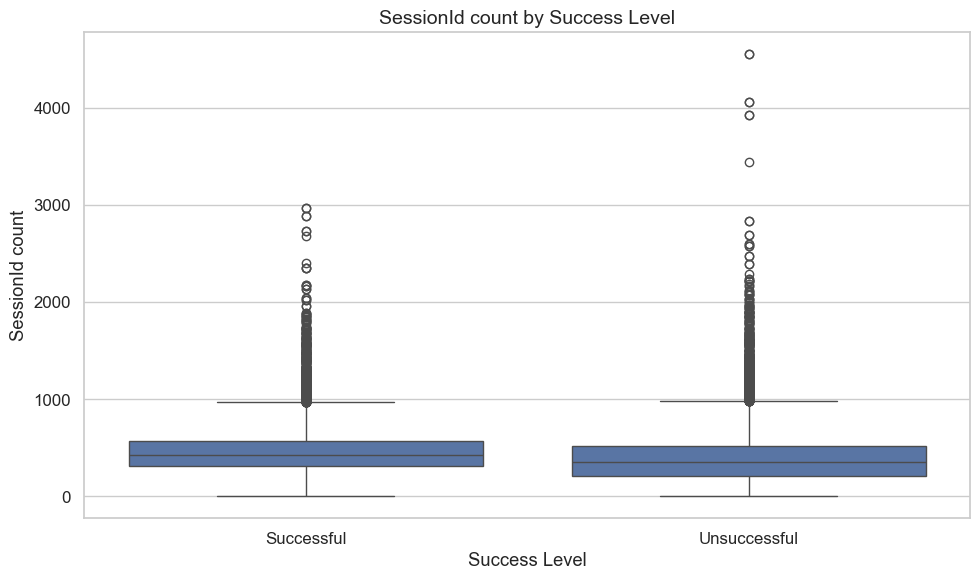

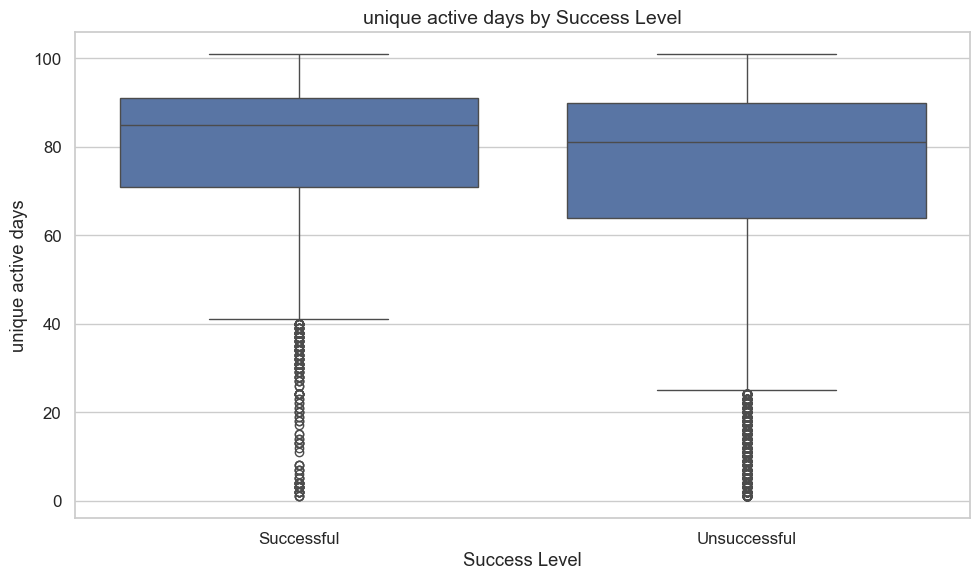

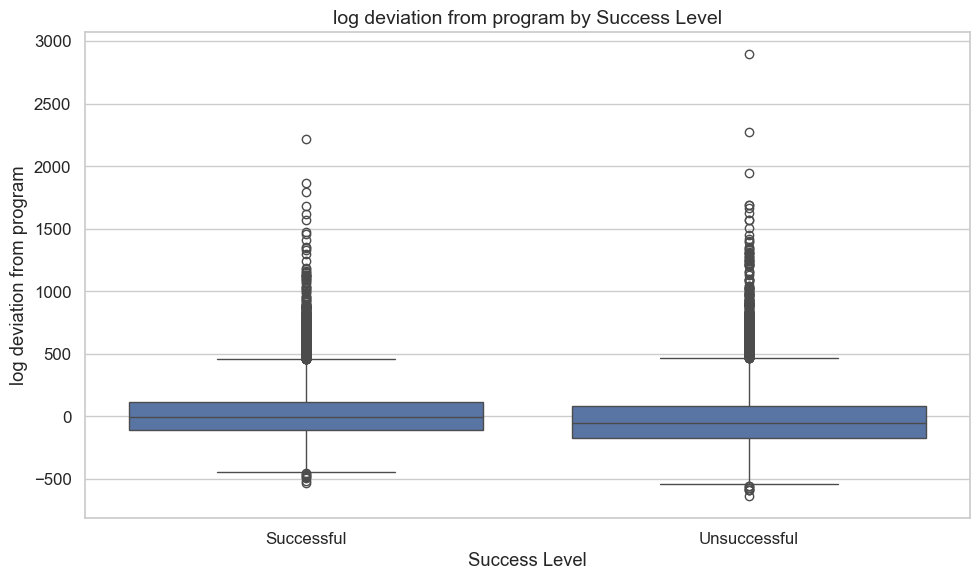

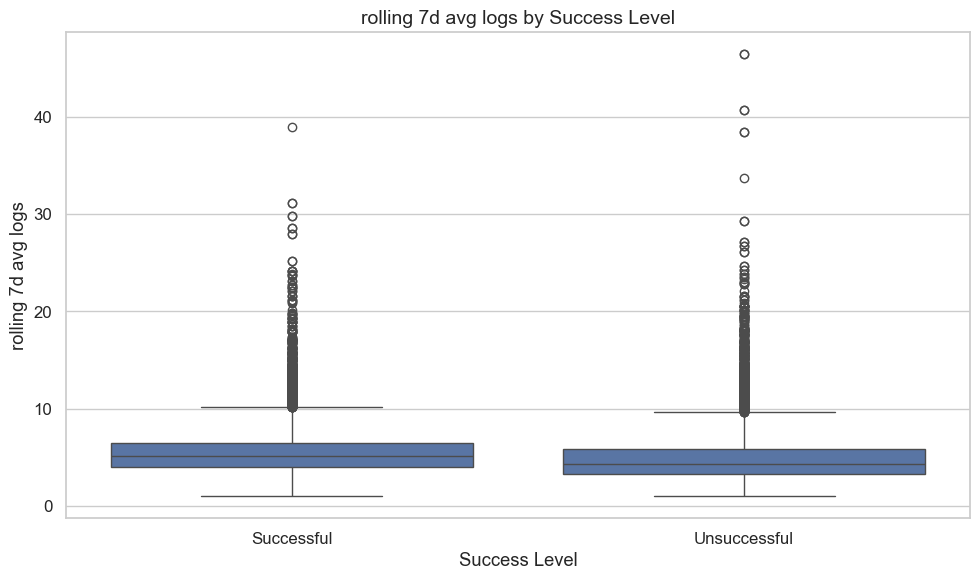

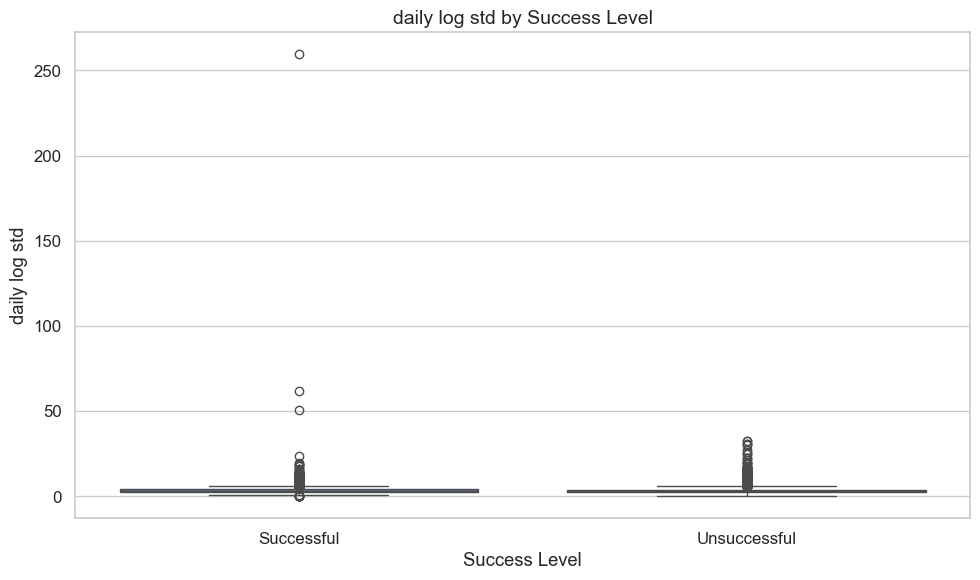

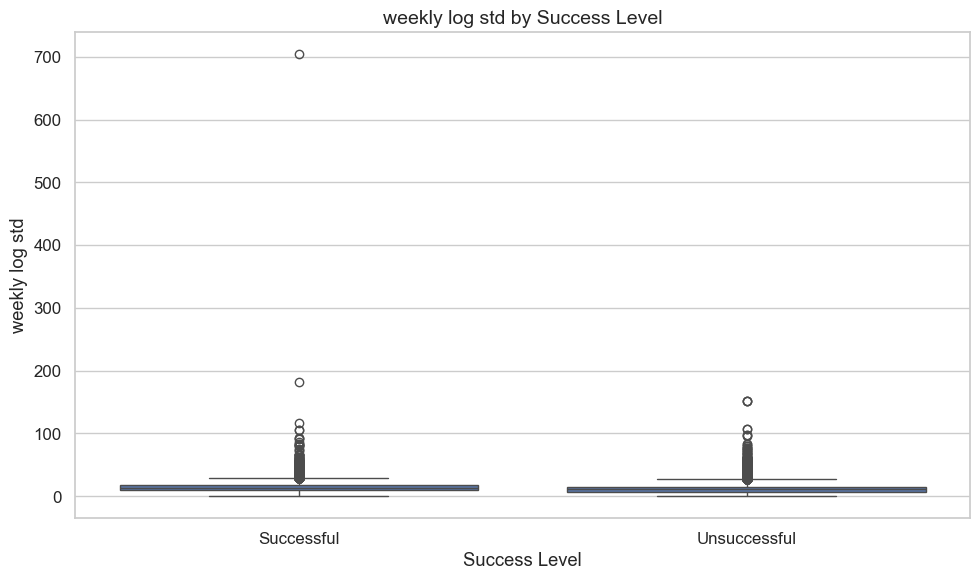

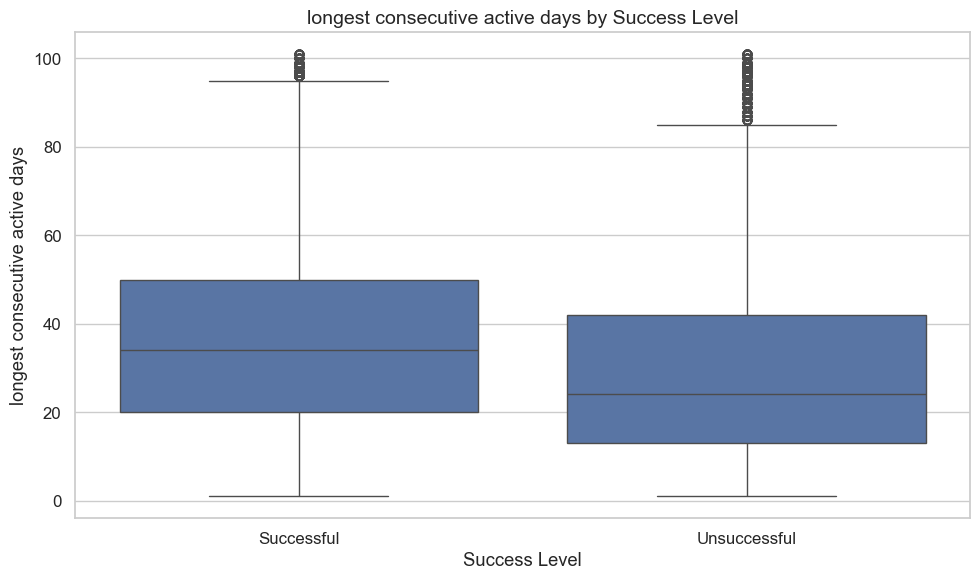

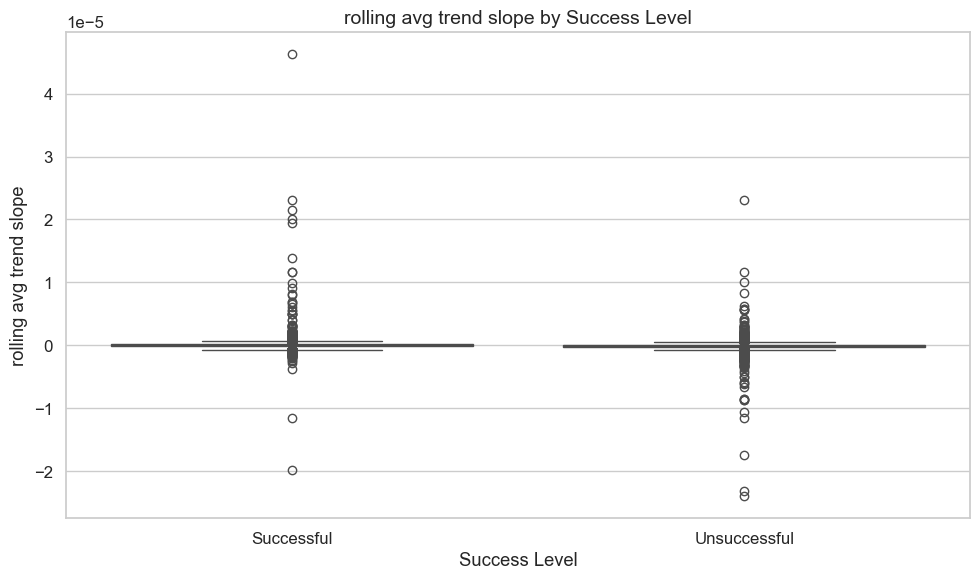

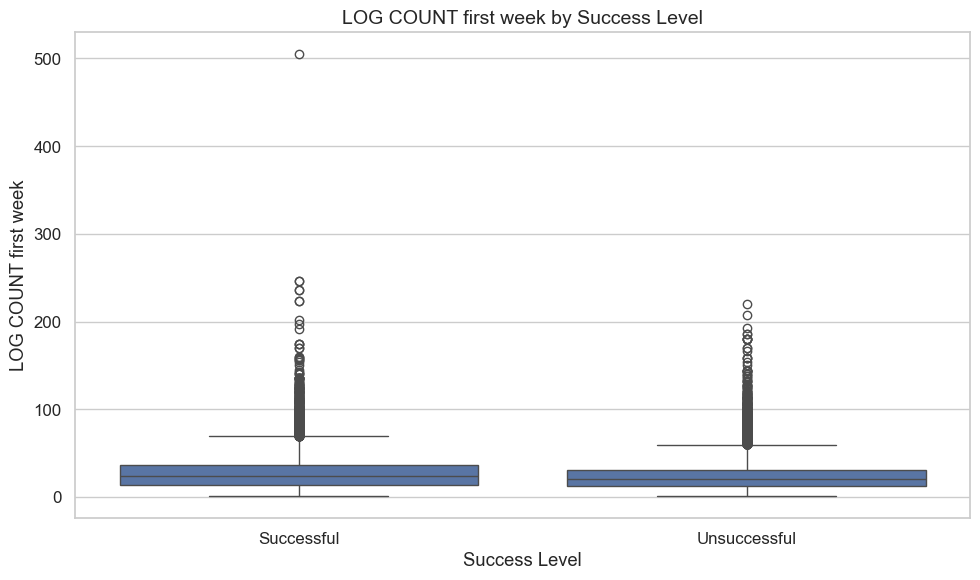

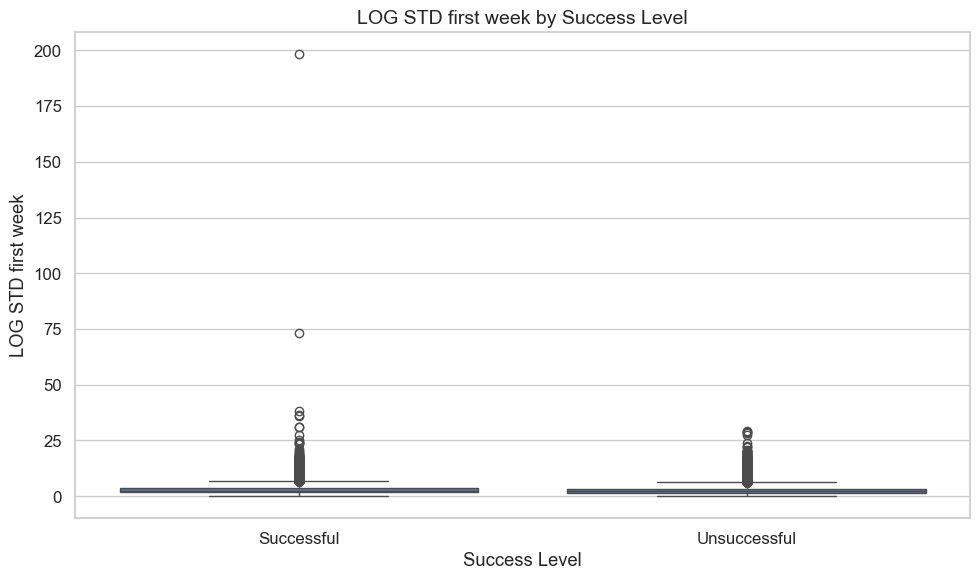

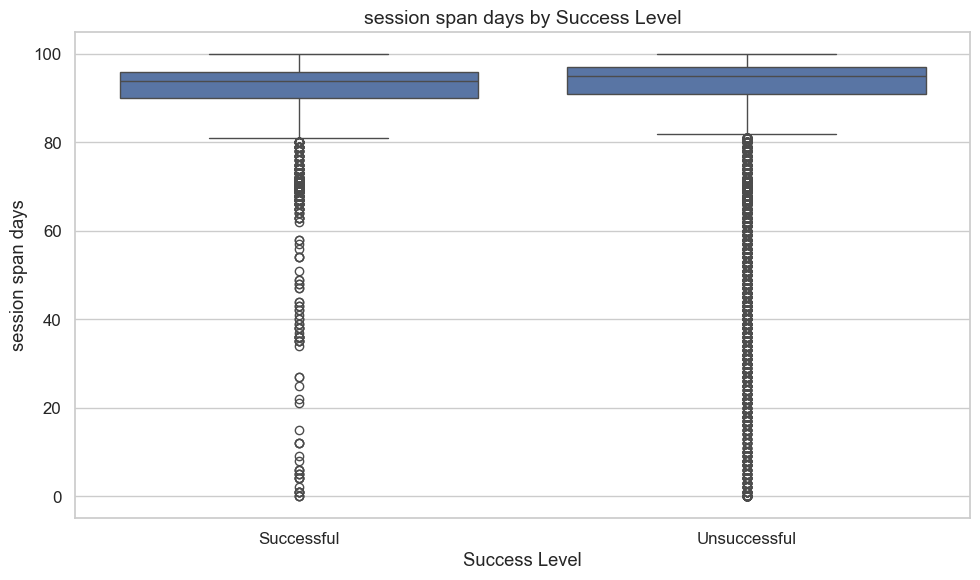

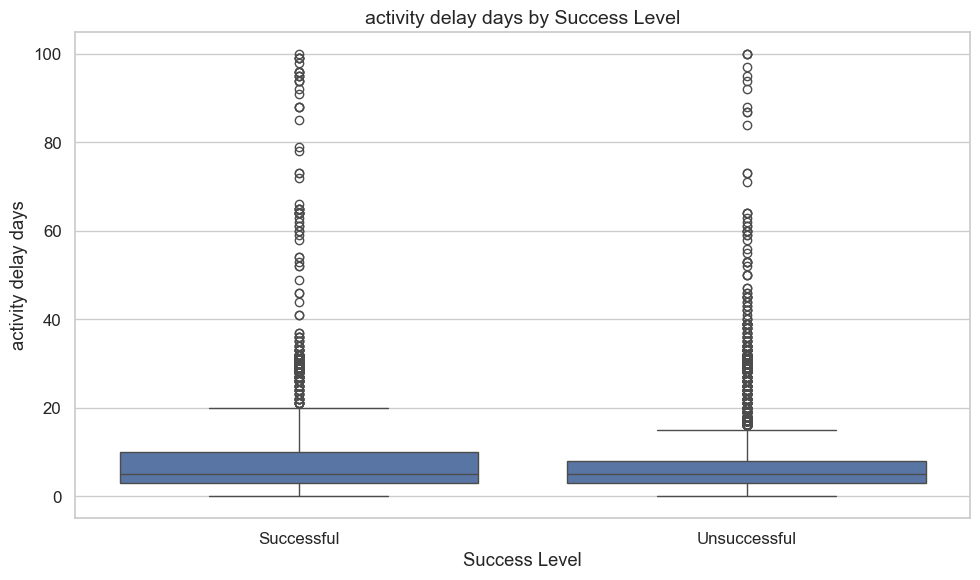

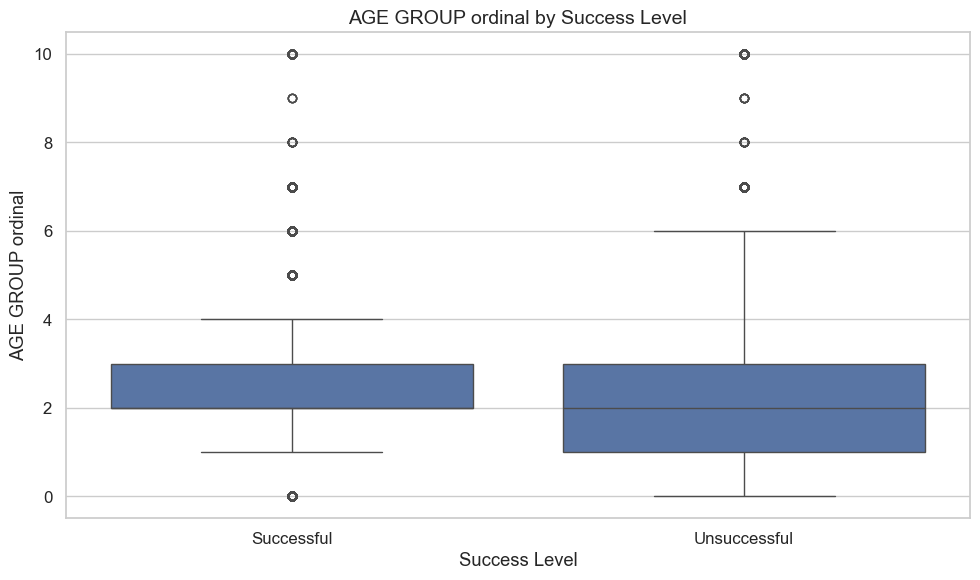

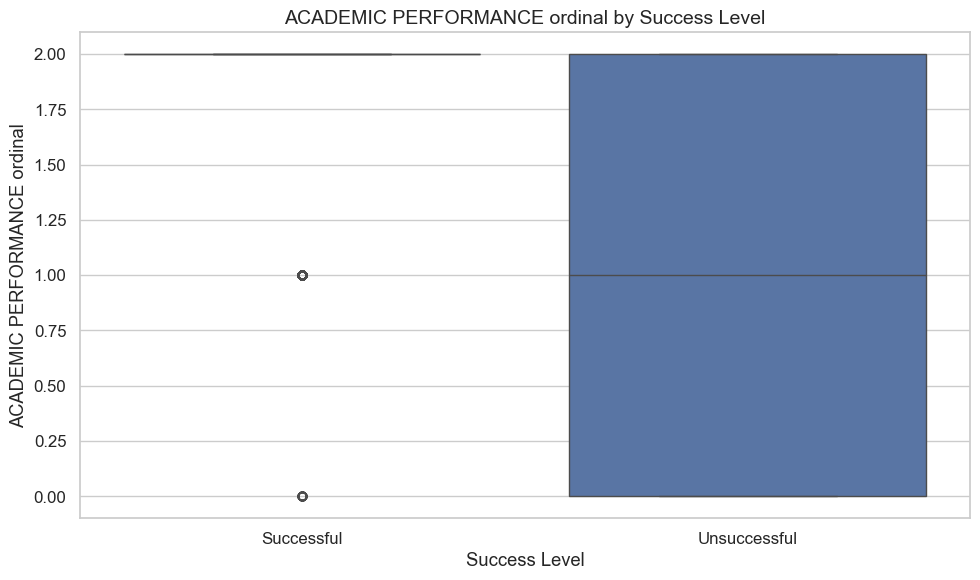

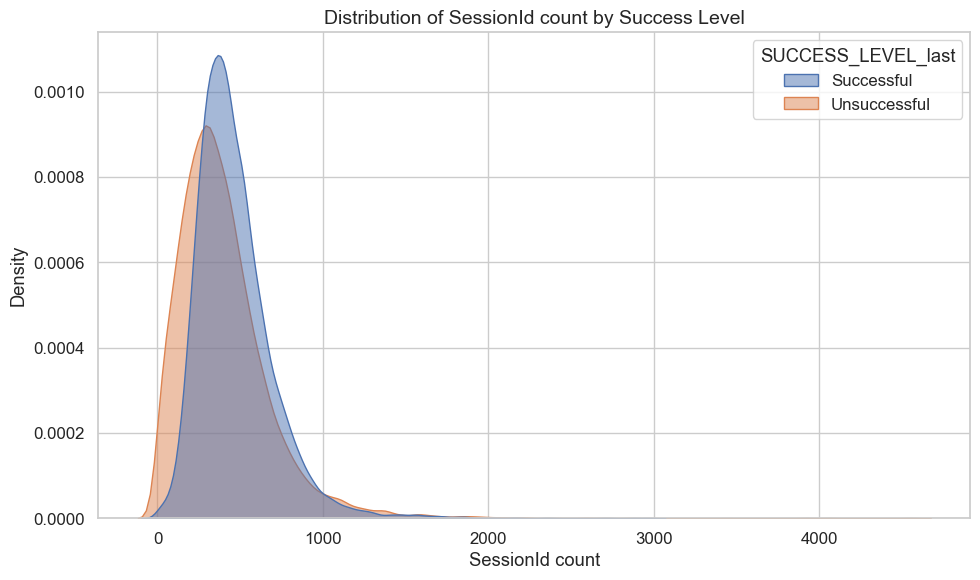

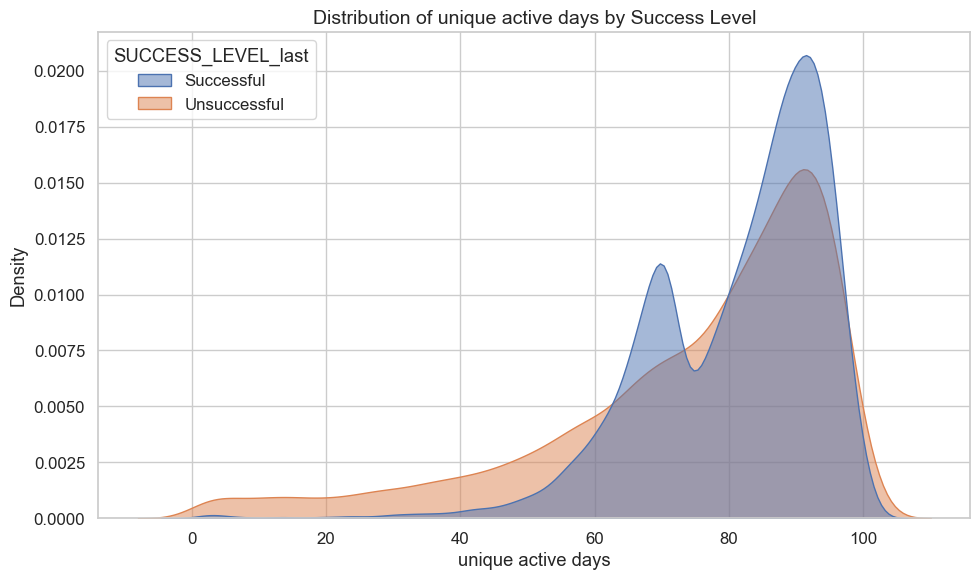

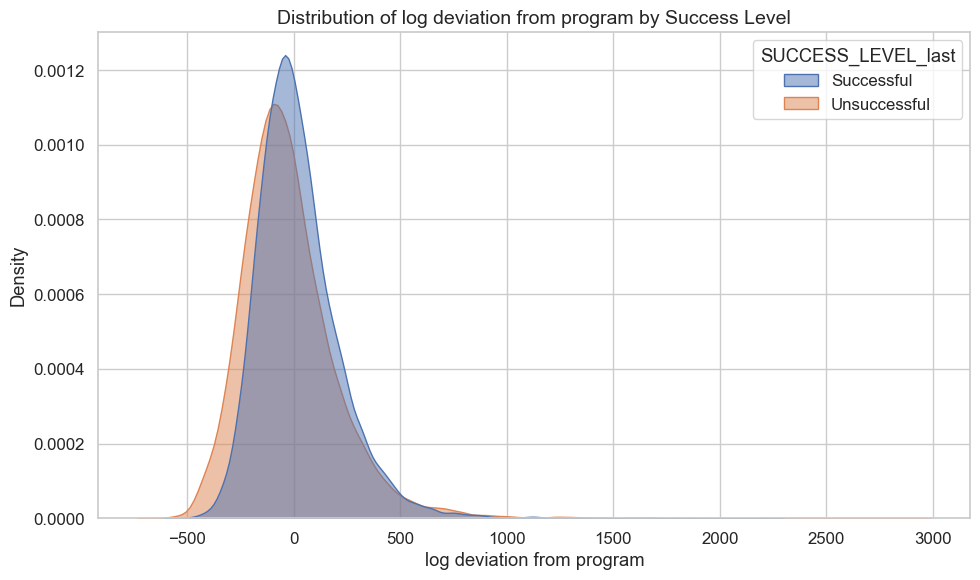

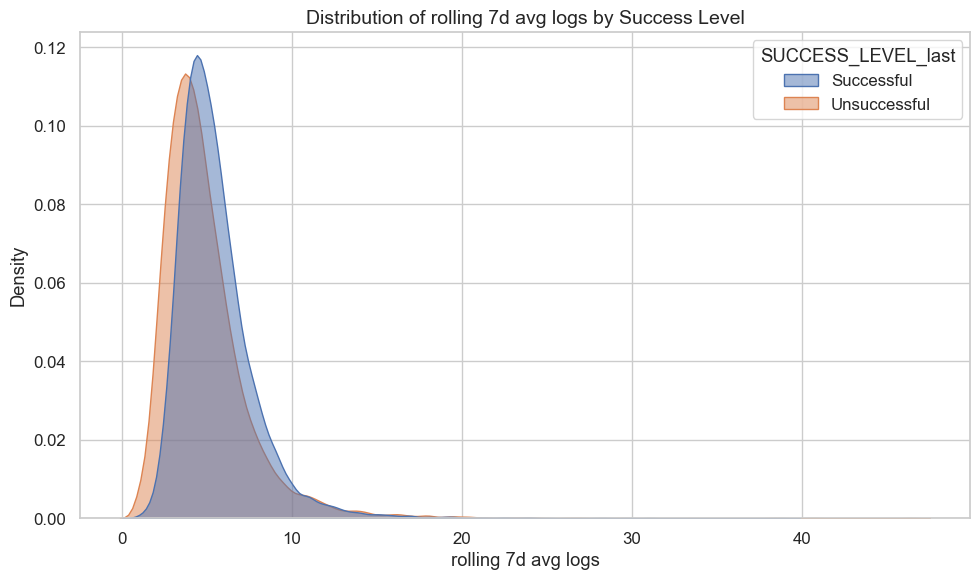

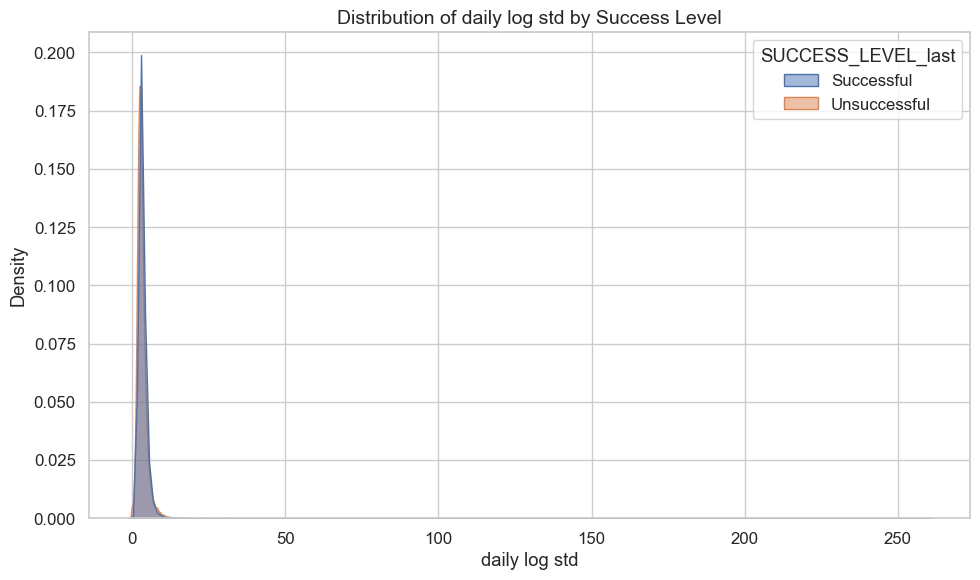

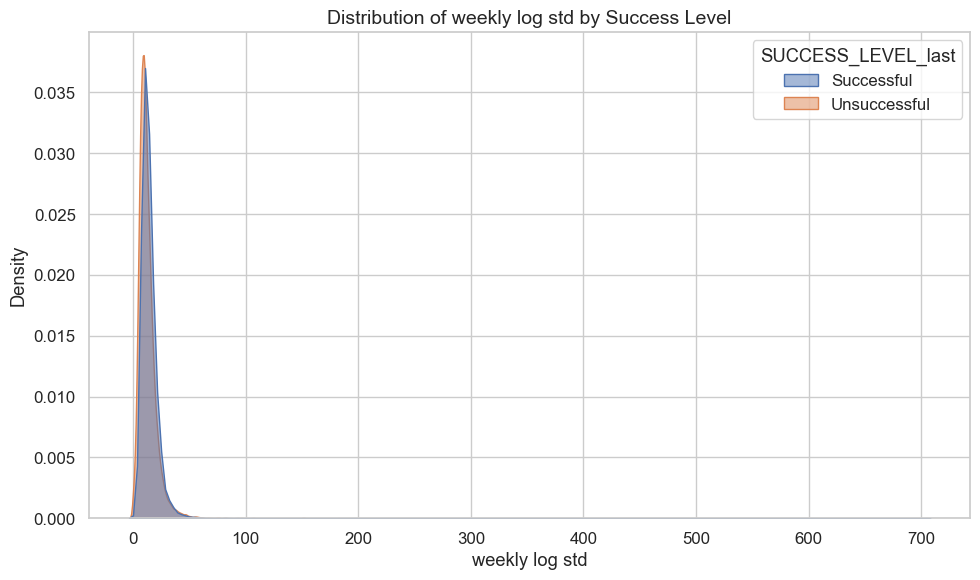

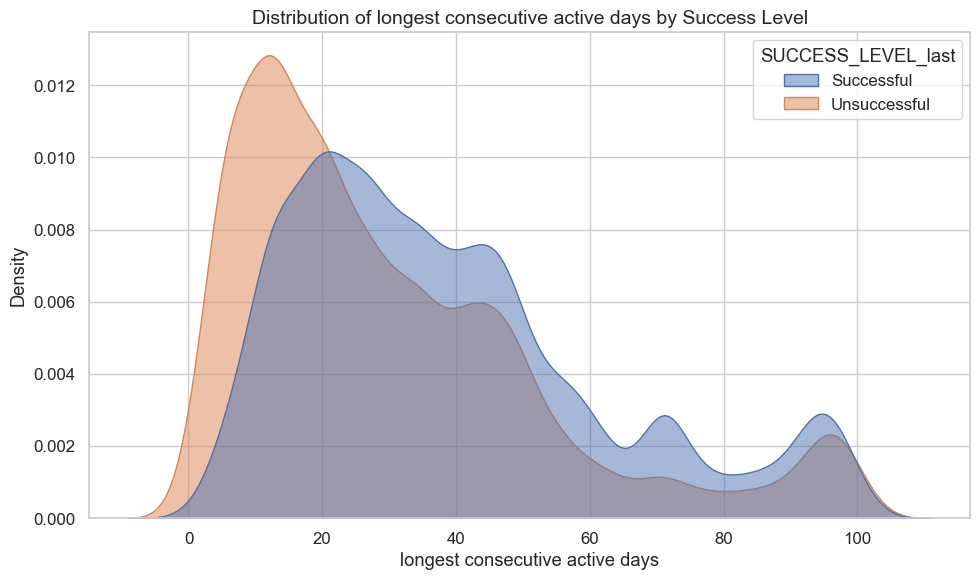

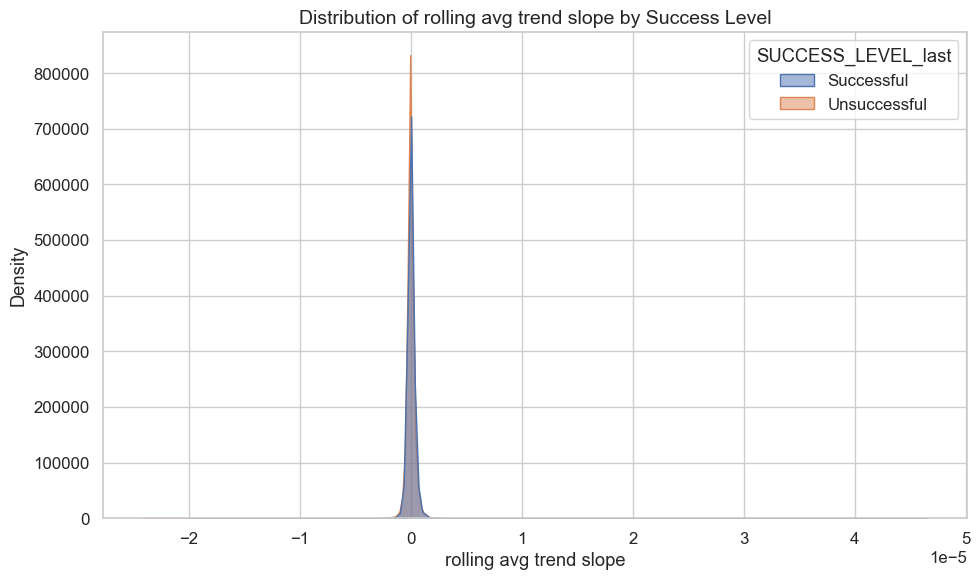

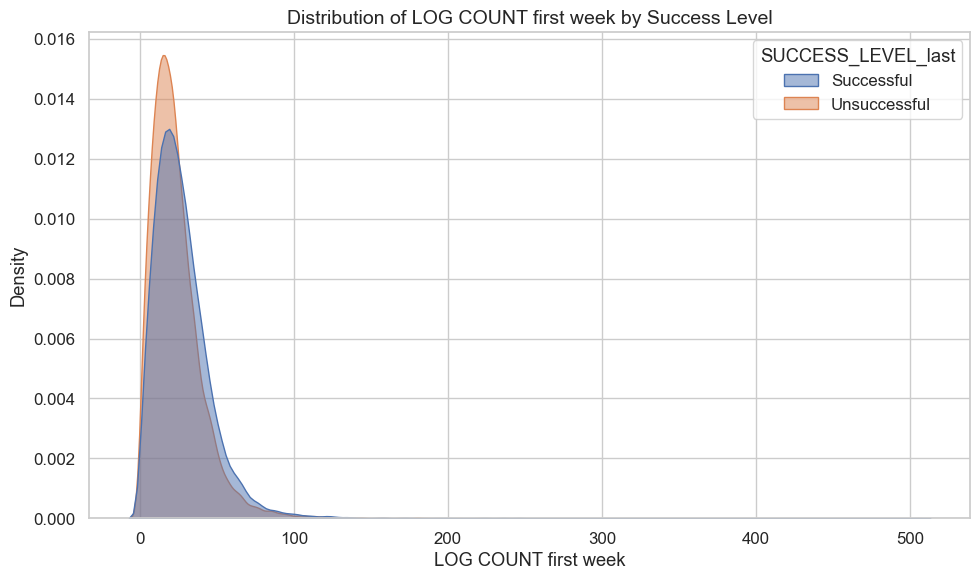

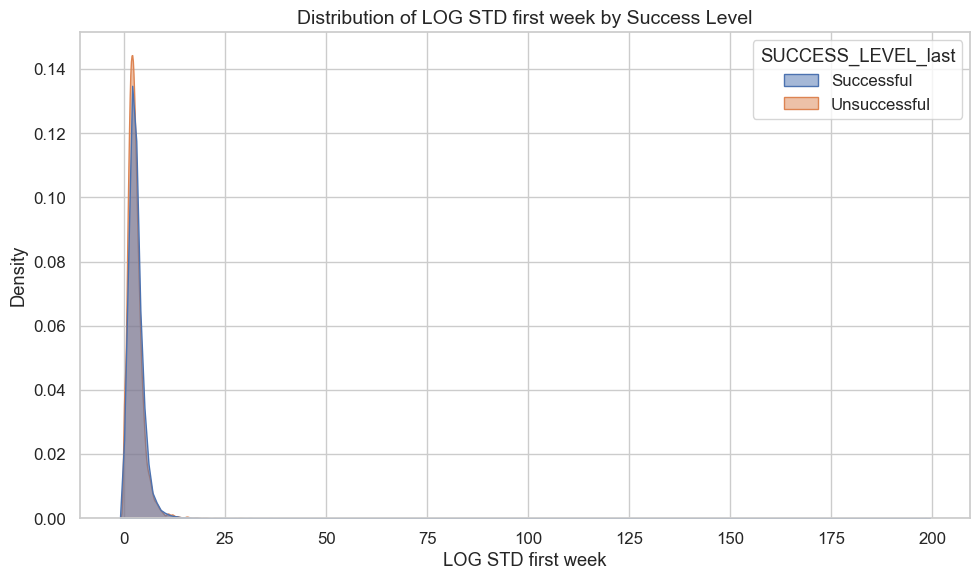

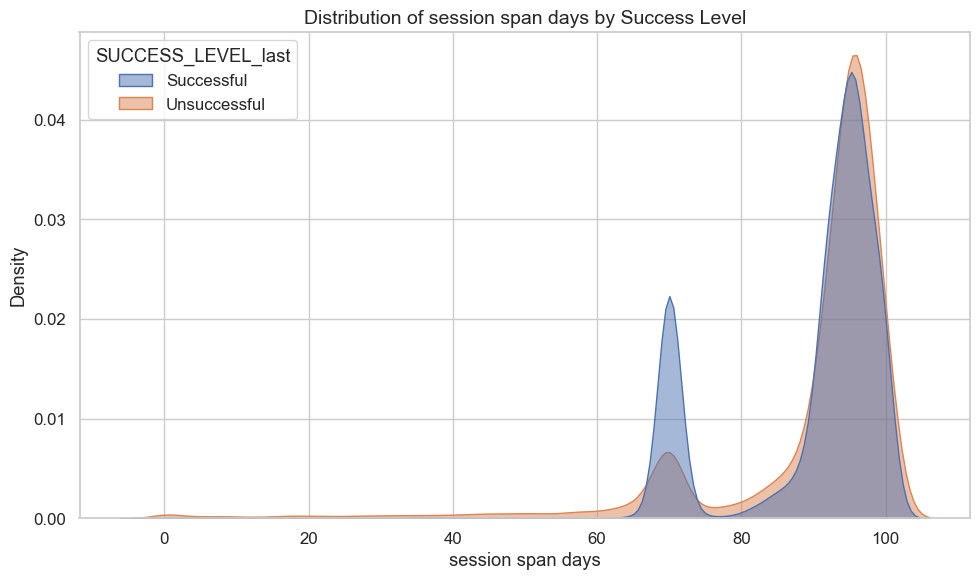

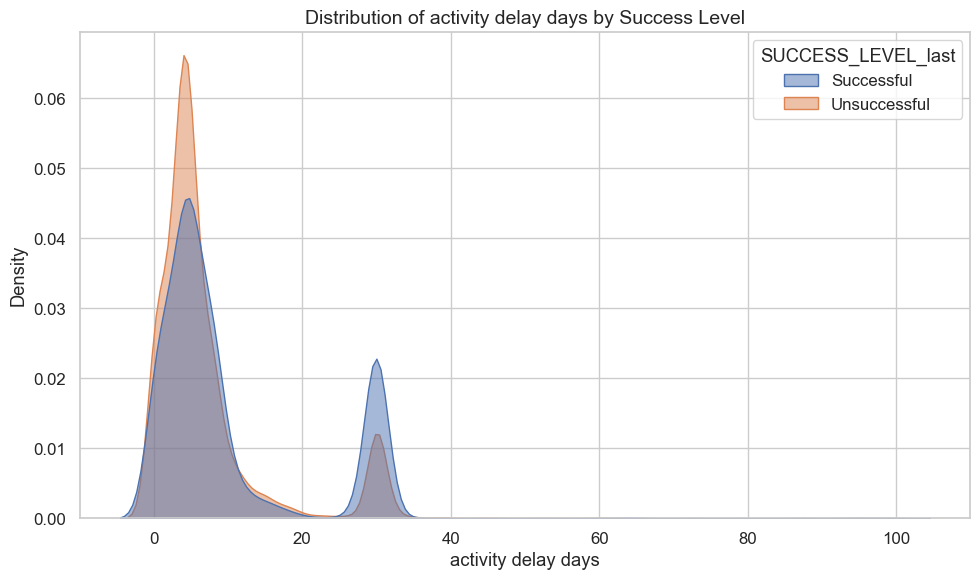

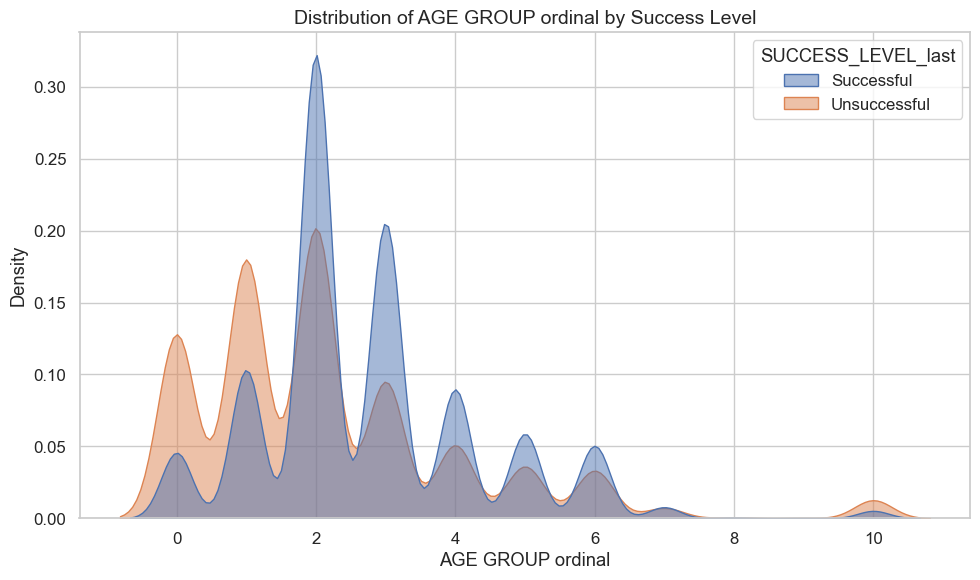

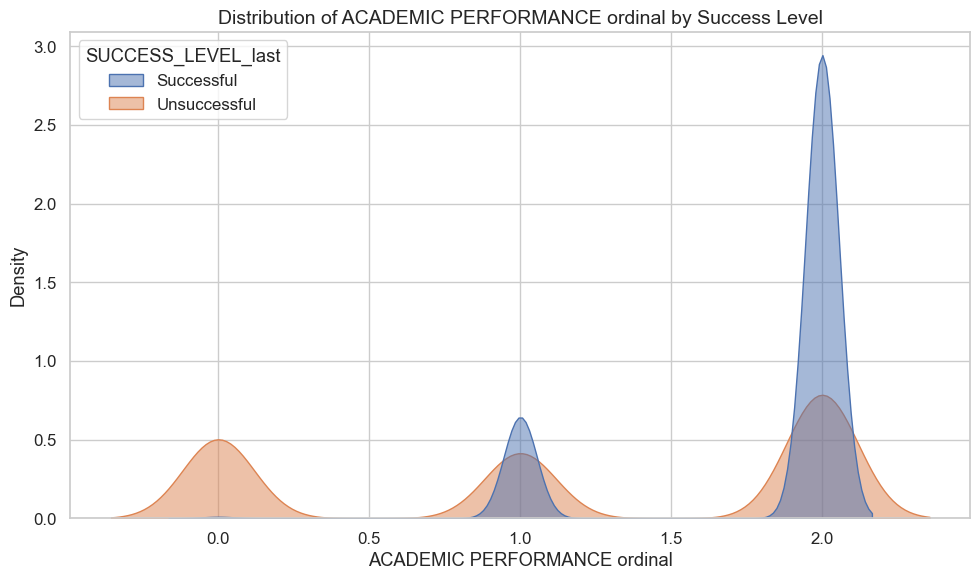

In [5]:
sns.set_theme(style='whitegrid', font_scale=1.1, palette='deep')
print("Starting EDA visualizations...")

# --- Target Variable Distribution ---
plt.figure(figsize=(8, 6))
sns.countplot(data=df_user, y='SUCCESS_LEVEL_last', order=df_user['SUCCESS_LEVEL_last'].value_counts().index.unique())
plt.title('Distribution of Success Level', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Success Level')
plt.tight_layout()
plt.show()

# --- Categorical Predictors vs. Success Level ---
categorical_cols = [col for col in df_user.columns if df_user[col].dtype == 'object']
categorical_cols.remove('SUCCESS_LEVEL_last')  # Exclude target variable
categorical_cols.remove('new_id')  # Exclude primary program code
categorical_cols.remove('Timestamp_max') # Exclude timestamp
categorical_cols.remove('Timestamp_min')

for col in categorical_cols:
    value_counts_index = df_user[col].value_counts().index
    # Ensure the index for ordering is unique
    unique_index = value_counts_index.unique()

    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_user, y=col, hue='SUCCESS_LEVEL_last', order=unique_index)
    plt.title(f'Success Level by {col.replace("_first", "").replace("_last", "").replace("_", " ").strip()}', fontsize=14)
    plt.xlabel('Count')
    plt.ylabel(col.replace("_first", "").replace("_last", "").replace("_", " ").strip())
    plt.legend(title='Success Level')
    plt.tight_layout()
    plt.show()

# --- Numerical Predictors vs. Success Level (Box Plots) ---
numerical_cols = df_user.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('PRIMARY_PROGRAM_CODE_first')  # Exclude

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    # Create a temporary DataFrame without rows where the current numerical column is NaN
    df_plot = df_user.dropna(subset=[col])
    sns.boxplot(x='SUCCESS_LEVEL_last', y=col, data=df_plot)
    plt.title(f'{col.replace("_", " ")} by Success Level', fontsize=14)
    plt.xlabel('Success Level')
    plt.ylabel(col.replace("_", " "))
    plt.tight_layout()
    plt.show()

# --- Numerical Predictors vs. Success Level (Distribution Plots - KDE) ---
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    # Create a temporary DataFrame without rows where the current numerical column is NaN
    df_plot = df_user.dropna(subset=[col])
    sns.kdeplot(data=df_plot, x=col, hue='SUCCESS_LEVEL_last', fill=True, alpha=.5)
    plt.title(f'Distribution of {col.replace("_", " ")} by Success Level', fontsize=14)
    plt.xlabel(col.replace("_", " "))
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()


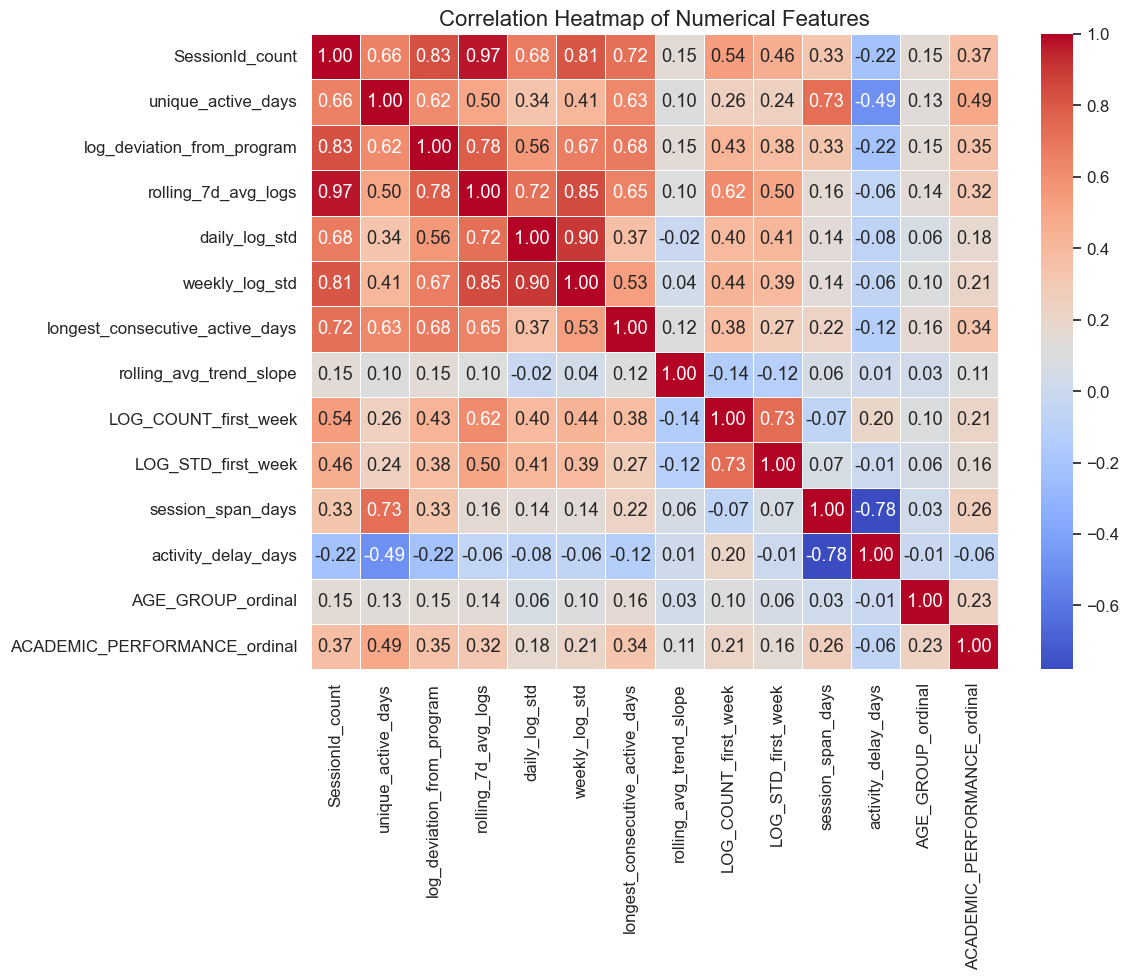

In [8]:
# --- Correlation Heatmap of  Features ---
# Calculate the correlation matrix, exclude PRIMARY_PROGRAM_CODE_first
correlation_matrix = df_user[numerical_cols].corr()
# Drop the 'PRIMARY_PROGRAM_CODE_first' column if it exists
if 'PRIMARY_PROGRAM_CODE_first' in correlation_matrix.columns:
    correlation_matrix = correlation_matrix.drop(columns=['PRIMARY_PROGRAM_CODE_first'])

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()